## REI602M Machine Learning - Homework 2
### Due: Sunday 31.1.2021

**Objectives**: Locally weighted regression, model assessment and model selection, classification and nearest neighbor classifiers.

**Name**: Alexander Guðmundsson, **email: ** alg35@hi.is, **collaborators:** ()

Please provide your solutions by filling in the appropriate cells in this notebook, creating new cells as needed. Hand in your solution on Gradescope. Make sure that you are familiar with the course rules on collaboration (encouraged) and copying (very, very, bad).

*This is a time consuming assignment. Start early!*

1) [Locally weighted regression, LWR, 25 points] In LWR the predicted value for point $\hat{x}$ is obtained by fitting a local regression model to the data. This is done by assigning individual weights $w_i$ to all the points in the data set with the weight depending on how close they are to $\hat{x}$ and then minimizing the following cost function
$$
J(\theta) = \frac{1}{2}\sum_{i=1}^n w_i (\theta^T x^{(i)} - y^{(i)})^2
$$
where $w_i > 0$ is the weight given to point $x^{(i)}$. We will use the *Gaussian kernel*
$$
   w_i = \exp\left({-\frac{||\hat{x} - x^{(i)}||^2_2}{2\sigma^2}}\right), \qquad i=1,\ldots n
$$
where $\sigma>0$ is a parameter that needs to be specified.

Note that the values of the $w_i$'s depend on the point $\hat{x}$ we are predicting. It can be shown that the parameters that minimize the cost function can be obtained by solving a system of linear equations,
$$
(X^T W X)\theta = (X^T W)\overrightarrow{y}
$$
where $W$ is an $n \times n$ diagonal matrix with the $w_i$'s on the diagonal ($W_{1,1}=w_1, W_{2,2}=w_2$ etc., all other entries are zero), $X$ is a matrix containing all the $x^{(i)}$ values and $\overrightarrow{y}$ is a vector containing all the $y^{(i)}$-values. The prediction is obtained by calculating $\hat{y}=\theta^T \hat{x}$. If we later want to make a prediction about another point, $x'$, we need to recalculate the set of weights and obtain a new set of $\theta$'s.

Create a function which implements LWR by solving the system of equations given above (see Jupyter notebook `vika_01_demo.ipynb` for details on how to solve a similar system in NumPy). Assume a local model on the form $f_\theta(x)=\theta_0 + \theta_1 x$.

Apply your function to the global warming data in `global.csv` to predict temperature fluctuations on a monthly basis between 1850 and 2015, after first scaling the $x$ values into $[-1,1]$ with $\tilde{x}^{(i)}=x^{(i)}-\min/(\max - \min){k=1 \ldots n}[x^{(k)}]$ to avoid numerical issues.

Create a scatter plot of the original data points and overlay with the predicted values (using a different color). Use $\sigma=0.25$ (this value is not optimal for this data set, more on that later).

*Comments*: 

1) The following functions may be useful: `numpy.dot`, `numpy.linalg.norm`, `numpy.diag`, `numpy.exp`. Note that the `norm` and `diag` functions require NumPy arrays as inputs. To create a numpy array of evenly spaced values use `numpy.linspace`.

2) The global warming data set contains global annual temperature measurements from 1850 to 2015 (Celcius scale). The values have been scaled so that they represent temperature anomalies relative to the 1961 - 1990 average. The data comes from https://cdiac.ess-dive.lbl.gov/trends/temp/jonescru/jones.html

3) Locally weighted regression is not useful at all for extrapolation and predictions for time points outside the 1850 - 2015 interval will be highly inaccurate.

(166, 2)


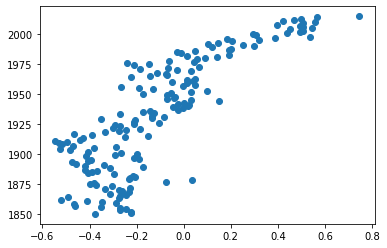

In [17]:
import numpy as np
import matplotlib.pyplot as plt

#---- need to change later ------
def gauKernel():
    predictx


# Load data
data = np.genfromtxt('./global.csv', delimiter=',', 
                     skip_header=1) 
print(data.shape)

# Insert code here
n = data.shape[0]

p = data.shape[1]

y = data[:,0:-1] #years

X = np.c_[np.ones(n), data[:,-1]] #Annual

plt.scatter(X[:,1],y)


2) [Model selection, 25 points] This is a continuation of the previous exercise. Here you will implement a simple method  for determining a value for the $\sigma$ hyper-parameter in LWR. The method is as follows:
    
1. Iterate over a range of hyper-parameter values.<br>
2. $\quad$ Repeat 100 times:
3. $\qquad$ Create a random permutation of the dataset.
4. $\qquad$ Set 20% of the (permuted) points aside to use as a test set.
5. $\qquad$ Use the remaining data points to fit a model using LWR.
6. $\qquad$ Evaluate the MSE on the test set.
7. $\quad$ Calculate the average MSE for the 100 trials and store in a vector.
8. $\quad$ (this becomes the prediction error estimate for the current value of the hyper-parameter).
9. Return the hyper-parameter value that corresponds to the smallest MSE.

Implement the above model selection procedure. Create a figure which shows how the test set MSE varies as a function of the value of $\sigma$. Select the parameter value corresponding to the smallest MSE and create a final figure showing how the resulting model fits the original data. Do you think that your model captures the original data sufficiently well?

*Comments*:
1) k-fold cross-validation could also be used to select the value of $\sigma$.

2) This strategy for selecting hyper-parameters can be used with other learning algorithms.

3) If you get the error message `Singular Matrix` when solving $(X^T W X)\theta = (X^T W)y$ for $\theta$, the value of $\sigma$ may be too small. There is no need to go above $\sigma = 0.25$.

4) The `math.floor` and `math.ceil` functions are handy for computing indices into the train and validation sets. The function `numpy.average` returns the average of an array. To create a numpy array of evenly spaced values use `numpy.linspace`. To locate the smallest element in an array use `numpy.argmin`. To create a randomly permuted copy of the dataset $(X,y)$ you can use

`perm=numpy.random.permutation(len(y))`<br>
`Xperm=X[perm]`<br>
`yperm=y[perm]`<br>

In [2]:
# Insert code here
# ...

3) [Classification of images by a nearest neighbor classifier, 25 points] The Fashion-MNIST data set consists of a *training set* of 60,000 examples and *test set* of 10,000 examples. Each example is a 28 by 28 grayscale image from one of 10 classes. Each image will simply be treated as a vector of gray scale values in your classifier.

Start by downloading the dataset from https://notendur.hi.is/steinng/kennsla/2021/ml/data/fashion-mnist.zip (30 MB).

Implement a 1-nearest neighbor classifier using only "basic" Numpy functionality, i.e. matrix/vector operations and array sort. To get efficient code you need to avoid Python for-loops as much as possible. You do this by performing the computations in terms of matrix and vector operations. Use the training set to classify images in the test set, treating each image as a 784 dimensional vector. Training and testing classifiers on the full data set is computationally demanding and therefore you should work with subsets of the training and test data with only a few thousand examples while developing  your code.

Once your code appears to be running correctly increase the amount of training data and use a larger test set (e.g. with 2000 examples). Evaluate the effect of training set size on test set accuracy by varying the size of the training set (try e.g. 5 - 10 different values), starting with $n=1000$. Create a graph which shows the test set accuracy as a function of the training set size. At what point does the accuracy more or less stop improving?

*Comments*:

1) The 28x28 images have been stacked in 28 \* 28 = 784-element vectors which serve as input to the training/test procedures. A pre-processing scaling step is *not* needed for this particular data set for reasons that we will get into later in the course.

2) To visualize a single raw image (here the first test example) you can use:
```python
matplotlib.pyplot.imshow(1 - X_test[0].reshape(28,28),interpolation='none',cmap='gray')```

3) To create a random subset of the training or test sets of size n you can use the `data_subsample` function below, e.g. with 
```python
X_train = data_subsample(X_train, y_train, 1000)```

4) You can use either accuracy (fraction of correctly classified examples) or error rate (fraction of incorrectly classified examples = 1 - accuracy) as a measure of success.

5) If your labtop is having a meltdown, consider using Google Colab instead (free).

6) More information on the Fashion-MNIST data set can be found here: https://github.com/zalandoresearch/fashion-mnist, including results for several different classifiers (see Benchmark).

In [40]:
import numpy as np
import mnist_reader
import matplotlib.pyplot as plt


def data_subsample(X, y, n):
    # Select a random subset of the training data
    perm = np.random.permutation(len(y))
    X_sub=X[perm[0:n],:]
    y_sub=y[perm[0:n]]
    return X_sub, y_sub

#--------CHANGE LATER!!!
def euclidian_distance(a, b):
        return np.sqrt(np.sum((a - b)**2, axis=0))
    
def kneighbors(x_test, x_train, y_test, y_train,  return_distance=False):
       
    n_neighbors = 1
    dist = []
    neigh_ind = []
    point_dist = np.array([euclidian_distance(x_test, x_train[i]) for i in range(len(y_test))])
    x_train = np.c_[np.ones()]
    
    
    """
    for row in point_dist:
        enum_neigh = enumerate(row)
        sorted_neigh = sorted(enum_neigh, key=lambda x: x[1])[:n_neighbors]

        ind_list = [tup[0] for tup in sorted_neigh]
        dist_list = [tup[1] for tup in sorted_neigh]

        dist.append(dist_list)
        neigh_ind.append(ind_list)

    if return_distance:
        return np.array(dist), np.array(neigh_ind)

    return np.array(neigh_ind)"""

def predict(x_test, x_train, y_test, y_train, weights='uniform'):
        
    class_num = 10

    if weights=='uniform':
        neighbors = kneighbors(x_test,x_train,y_test, y_train)
        y_pred = np.array([np.argmax(np.bincount(y_train[neighbor])) for neighbor in neighbors])

        return y_pred 

    if weights=='distance':

        dist, neigh_ind = kneighbors(X_test, return_distance=True)

        inv_dist = 1/dist

        mean_inv_dist = inv_dist / np.sum(inv_dist, axis=1)[:, np.newaxis]

        proba = []

        for i, row in enumerate(mean_inv_dist):

            row_pred = self.y_train[neigh_ind[i]]

            for k in range(class_num):
                indices = np.where(row_pred==k)
                prob_ind = np.sum(row[indices])
                proba.append(np.array(prob_ind))

        predict_proba = np.array(proba).reshape(X_test.shape[0], class_num)

        y_pred = np.array([np.argmax(item) for item in predict_proba])

        return y_pred
    
    
def score(x_test, x_train, y_test, y_train):
    y_pred = predict(x_test, x_train, y_test, y_train)
        
    return float(sum(y_pred == y_test))/ float(len(y_test))

        


X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')
print("Training set size", X_train.shape)
print("Test set size", X_test.shape)
print("Training set size", y_train.shape)

# Subsample (a.k.a. downsample) train and test sets to speed up development
# create a subsample of length 100
X_train_sub, y_train_sub = data_subsample(X_train, y_train, 100)
X_test_sub, y_test_sub = data_subsample(X_train, y_train, 100)

print(score(X_test_sub, X_train_sub, y_test_sub, y_train_sub))

plt.imshow(1 - X_train[17].reshape(28,28),interpolation='none',cmap='gray')
plt.show()

Training set size (60000, 784)
Test set size (10000, 784)
Training set size (60000,)


TypeError: ones() missing 1 required positional argument: 'shape'

In [ ]:
import matplotlib.pyplot as plt

# Visualize some images from the training set (10 images from each of the 10 classes)
plt.figure( figsize=(10, 8))
for cl in range(10):
    idx=np.where(y_train == cl)[0]
    for k in range(10):
        ax = plt.subplot(10, 10, cl*10+k+1)
        im = X_train[idx[k]].reshape(28,28)
        ax.imshow(im, interpolation='none',cmap='gray')
        ax.axis('off')

In [ ]:
# Insert your code here
# ...

4) [k-Nearest neighbors classifier, 25 points] In this exercise you train a $k$-NN classifier on the Fashion-MNIST data using the $k$-NN implementation in scikit-learn.

A *validation* set will be used to select a good value of the hyperparameter $k$. Cross-validation could also be used in principle but would take very long time here. Select 5000 examples at random from the training set (or fewer if running times are long) and set aside as a *validation* set. Keep the remaining 55000 examples for training.

Create a plot showing the accuracy of the $k$-NN classifier on the validation set as a function of $k$ in the range [1,12]. Which value appears to be optimal $k$? Report the test set accuracy for this value of $k$.

Provide a confusion matrix for the test set. Which classes are most often incorrectly classified?

*Comments*:

1) Use the `neighbors.KNeighborsClassifier` implementation in scikit-learn. This implementation uses kd_trees to speed up the neighbor search. To utilize mulitple CPU cores use the switch `n_jobs=-1`.

2) You should start by using subsets of the training data since running times are quite long. You are not obliged to use all the data!

3) We are using three non-overlapping data sets, a training set, validation set for hyperparameter tuning (a.k.a. model selection) and a test set for evaluation of the final classifier. This is frequently the case when training (or testing as is the case here) is too time consuming for cross-validation to be practical.

4) A *confusion matrix* is a $K \times K$ matrix where the element in row $i$ and column $j$ corresponds to the number of times class $i$ was classified as $j$. Diagonal elements thus correspond to correct classifications and off-diagonal elements to misclassifications. You can use the `sklearn.metrics.confusion_matrix` function to construct this matrix.


In [ ]:
# Insert your code here
# ...